In [1]:
#pip install pymysql

In [10]:
import pymysql
import pandas as pd

try:# Establish connection
    conn = pymysql.connect(
    host = 'localhost',
    user = 'root',
    password = 'Nagesh@1234',
    database = 'tumor',
    port = 3306
    )

    #load data into Dataframe
    query = "select * from `brain_tumor_dataset`"
    df = pd.read_sql(query, conn)

    # display results
    print("Connection successful ! Here's your data:")
    display(df.head())

except pymysql.Error as e:
    print(f'MySQL Error: {e}')

finally:
    if 'conn' in locals():
        conn.close()
        print("Connection closed")

Connection successful ! Here's your data:


C:\Users\NAGESH\AppData\Local\Temp\ipykernel_24148\1658758543.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


Connection closed


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           12 non-null     int64  
 1   Age                  12 non-null     int64  
 2   Gender               12 non-null     object 
 3   Tumor_Type           12 non-null     object 
 4   Tumor_Size           12 non-null     float64
 5   Location             12 non-null     object 
 6   Histology            12 non-null     object 
 7   Stage                12 non-null     object 
 8   Symptom_1            12 non-null     object 
 9   Symptom_2            12 non-null     object 
 10  Symptom_3            12 non-null     object 
 11  Radiation_Treatment  12 non-null     object 
 12  Surgery_Performed    12 non-null     object 
 13  Chemotherapy         12 non-null     object 
 14  Survival_Rate        12 non-null     float64
 15  Tumor_Growth_Rate    12 non-null     float

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Tumor_Type             0
Tumor_Size             0
Location               0
Histology              0
Stage                  0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Radiation_Treatment    0
Surgery_Performed      0
Chemotherapy           0
Survival_Rate          0
Tumor_Growth_Rate      0
Family_History         0
MRI_Result             0
Follow_Up_Required     0
dtype: int64

C:\Users\NAGESH\AppData\Local\Temp\ipykernel_24148\1191077310.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Tumor_Type', palette = 'coolwarm')


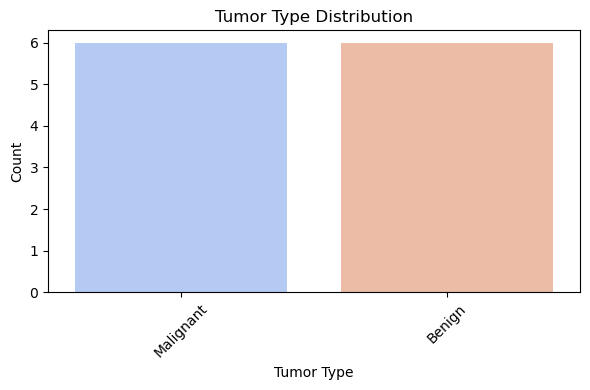

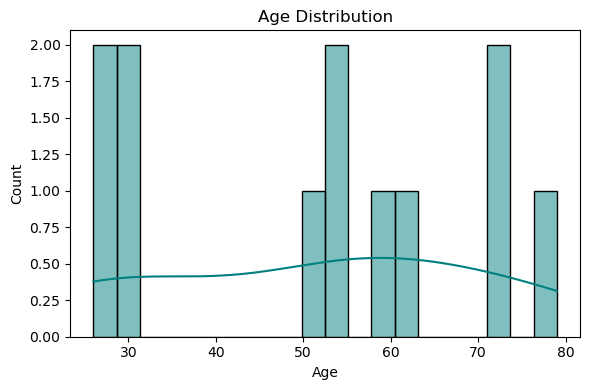

Accuracy:  0.33

Classification Report:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

Confusion Matrix:
 [[1 0]
 [2 0]]
✅ Model saved as 'random_forest_classifier.joblib'


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
#import pickle
import joblib

# drop irrelevant columns
df = df.drop(columns = ['Patient_ID'])

#-----------EDA---------------

# plot tumor type distribution
plt.figure(figsize = (6,4))
sns.countplot(data = df, x = 'Tumor_Type', palette = 'coolwarm')
plt.title("Tumor Type Distribution")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# plot distribution of age
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins = 20, kde = True, color = "teal")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.tight_layout()
plt.show()


# -------------Label Encoding -----------
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target
X = df.drop("Tumor_Type", axis = 1)
y = df['Tumor_Type']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

# Train Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
print(f'Accuracy: {accuracy_score(y_test, y_pred): .2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save model
# with open("random_forest_classifier.pkl", "wb") as f:
#     #pickle.dump(clf, f)
joblib.dump(clf, "random_forest_classifier.joblib")

print("✅ Model saved as 'random_forest_classifier.joblib'")


# print("✅ Model saved as 'random_forest_classifier.pkl'")

In [15]:
pip show scikit-learn

Name: scikit-learn
Version: 1.5.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\ProgramData\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------------------ --------------------- 3.9/8.7 MB 19.5 MB/s eta 0:00:01
   ------------------------------ --------- 6.6/8.7 MB 16.1 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 14.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
